In [1]:
 # for database connections
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres" # unique to user
SQL_IP = "localhost"
PORT = 5432
DATABASE = "ETL_MiniProject" # unique to user

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string) 

In [4]:
connection = engine.connect()

In [5]:
# TEST 
# Query the "campaign" table and load the results into a DataFrame
query = "SELECT * FROM campaign;" # This is the test
campaign_data = pd.read_sql(query, connection)

# Display the data in the DataFrame
campaign_data

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,2020-12-29,2021-05-30,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,2021-10-15,2021-11-30,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,2021-11-06,2021-12-10,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,2020-10-08,2021-04-11,cat2,subcat8


In [6]:
# Query 1: How many backers, what did they pledge and what was the outcome
query = "SELECT cf_id, backers_count, pledged, outcome FROM campaign;" # single line feels better for simple query

# Execute the query and load the results into a DataFrame
outcome_data = pd.read_sql(query, connection)

# Display the data in the DataFrame
outcome_data

,cf_id,backers_count,pledged,outcome
0,147,0,0,failed
1,1621,158,14560,successful
2,1812,1425,142523,successful
3,2156,24,2477,failed
4,1365,53,5265,failed
...,...,...,...,...
995,2986,2043,153216,successful
996,2031,112,4814,failed
997,1627,139,4603,canceled
998,2175,374,37823,failed


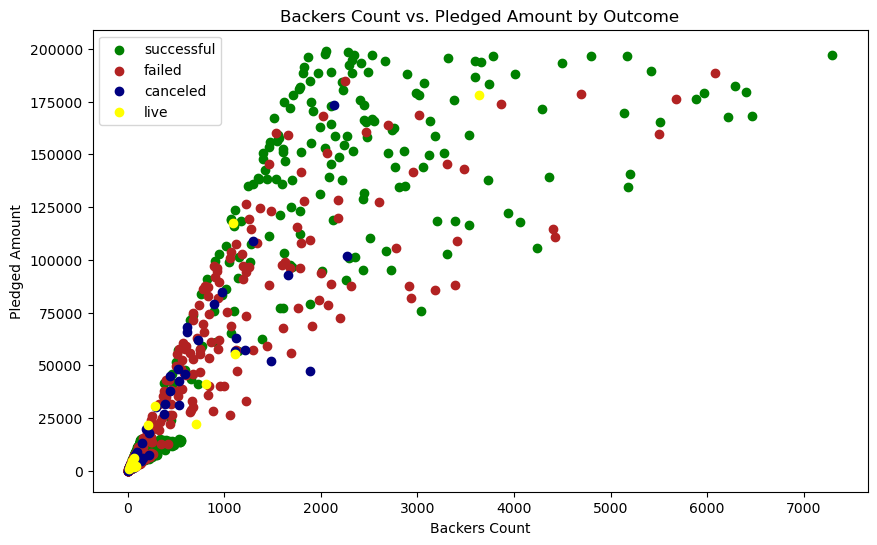

In [7]:
# Make Vis 
# Scatter plot for multiple items 
# Scatter Fig
plt.figure(figsize=(10, 6))
colors = {'successful': 'green', 'failed': 'firebrick', 'canceled': 'navy', 'live': 'yellow'}

for outcome, color in colors.items(): # fixed issues with the legend 
    subset = outcome_data[outcome_data['outcome'] == outcome]
    plt.scatter(subset['backers_count'], subset['pledged'], c=color, label=outcome)

# Labels/Legend
plt.xlabel('Backers Count')
plt.ylabel('Pledged Amount')
plt.title('Backers Count vs. Pledged Amount by Outcome')
plt.legend()

# Print
plt.show()

In [8]:
# Join campaign and contacts tables
# Looking for data connections
# c.* and co.* select all columns from both tables in the result set. (Help from Xpert)
query = '''
SELECT c.*, co.*
FROM campaign c
JOIN contacts co ON c.contact_id = co.contact_id
'''

# Execute and store
join_df = pd.read_sql(query, engine)

# Display 
join_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id,contact_id,first_name,last_name,email
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3,4187,Sofie,Woods,sofie.woods@riviere.com
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [9]:
# Query for finding outcome of subcategory 
# Moddled after the above query 
query = '''
SELECT c.outcome, s.subcategory
FROM campaign c
JOIN subcategory s ON c.subcategory_id = s.subcategory_id;
'''

# Execute and store
subcat_df = pd.read_sql(query, engine)

# Display 
subcat_df.head()

,outcome,subcategory
0,failed,food trucks
1,successful,rock
2,successful,web
3,failed,rock
4,failed,plays


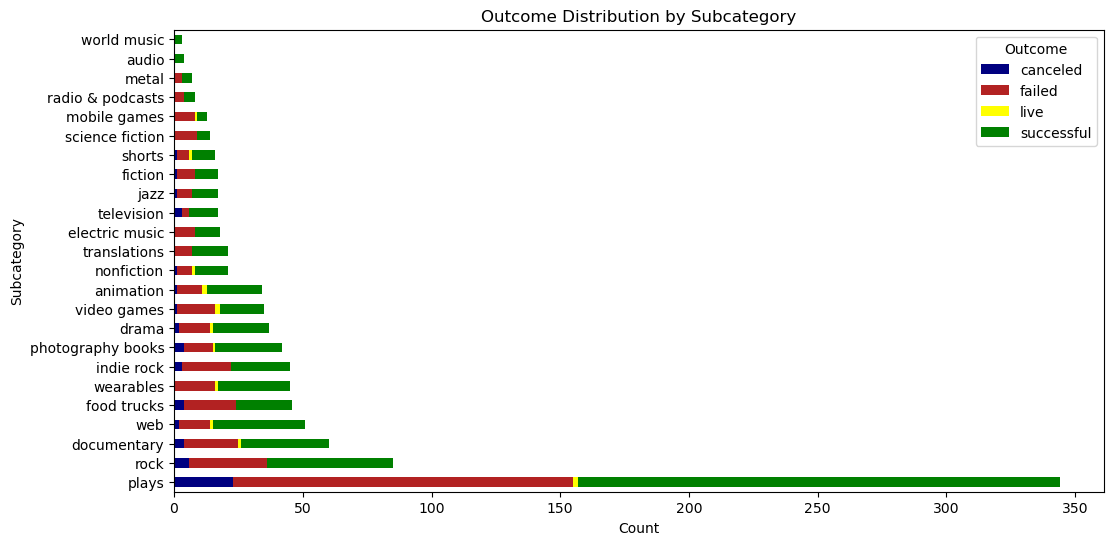

In [10]:
# Define custom colors for each outcome category
outcome_colors = {'successful': 'green', 'failed': 'firebrick', 'canceled': 'navy', 'live': 'yellow'}

# Group the data by subcategory and outcome counts
grouped_data = subcat_df.groupby(['subcategory', 'outcome']).size().unstack()

# Calculate outcomes
grouped_data['total_count'] = grouped_data.sum(axis=1)

# Organize chart 
grouped_data = grouped_data.sort_values(by='total_count', ascending=False)

# Plot a stacked barh chart with custom colors
grouped_data.drop('total_count', axis=1).plot(kind='barh', stacked=True, figsize=(12, 6), color=[outcome_colors.get(col, 'gray') for col in grouped_data.columns])
plt.title('Outcome Distribution by Subcategory')
plt.ylabel('Subcategory')
plt.xlabel('Count')
plt.legend(title='Outcome')

# Print
plt.show()

In [11]:
# AVG Query (averaged by campaign)
query = '''
SELECT campaign, AVG(pledged)
FROM campaign
GROUP BY campaign;
'''

# Execute the query and store the result in a DataFrame
avg_pledged = pd.read_sql_query(query, engine)

# Display the result
avg_pledged

,campaign,avg
0,"(2465,5251,Avila-Jones,""Implemented discrete s...",7322.0
1,"(971,3016,""Hill, Mccann and Moore"",""Streamline...",2091.0
2,"(120,3339,Kennedy-Miller,""Cross-platform compo...",3351.0
3,"(60,3961,""White, Torres and Bishop"",""Multi-lay...",14606.0
4,"(1173,4002,""Jackson PLC"",""Ergonomic 6thgenerat...",87676.0
...,...,...
995,"(2790,4129,Rice-Parker,""Down-sized actuating i...",48236.0
996,"(2389,2851,Casey-Kelly,""Sharable holistic inte...",13653.0
997,"(1401,4263,""Richardson Inc"",""Assimilated fault...",8907.0
998,"(699,4744,Mccann-Le,""Focused coherent methodol...",107743.0


In [12]:
# Find the outcome and currency for each campaign by category 
query = '''
SELECT c.outcome, c.currency, cat.category
FROM campaign c
JOIN category cat ON c.category_id = cat.category_id
'''

# Execute the query and store the result in a DataFrame
currency_df = pd.read_sql_query(query, engine)

# Display the result
currency_df

,outcome,currency,category
0,failed,CAD,food
1,successful,USD,music
2,successful,AUD,technology
3,failed,USD,music
4,failed,USD,theater
...,...,...,...
995,successful,USD,food
996,failed,USD,theater
997,canceled,EUR,theater
998,failed,USD,music


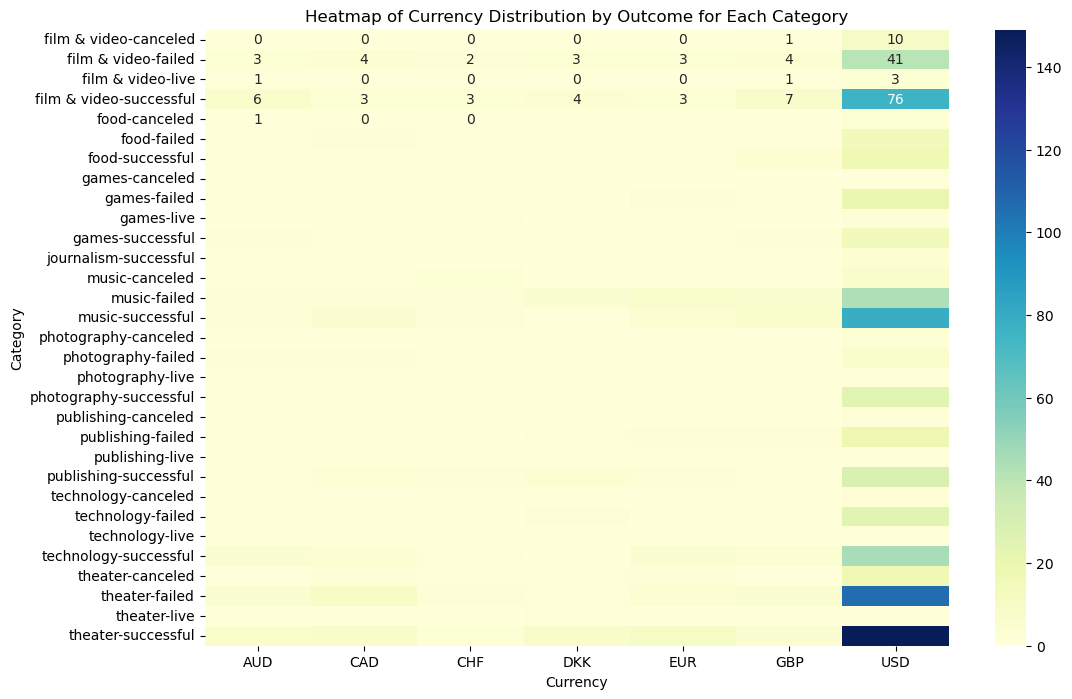

In [13]:
# Heatmap was a suggestion from Xpert to get more variety in vis
# Pivot the data to prepare for the heatmap
heatmap_data = currency_df.groupby(['category', 'outcome', 'currency']).size().unstack().fillna(0)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the distribution of the currency 
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')

# Set the title and labels
plt.title('Heatmap of Currency Distribution by Outcome for Each Category')
plt.xlabel('Currency')
plt.ylabel('Category')

# Show the plot
plt.show()

In [14]:
# How many backers, what did they pledge and what was the outcome
query = "SELECT count(goal) as goal , outcome FROM campaign group by  outcome"
           

# Execute the query and load the results into a DataFrame
goal_outcome = pd.read_sql(query, connection)

# Display the data in the DataFrame
goal_outcome

,goal,outcome
0,364,failed
1,14,live
2,57,canceled
3,565,successful


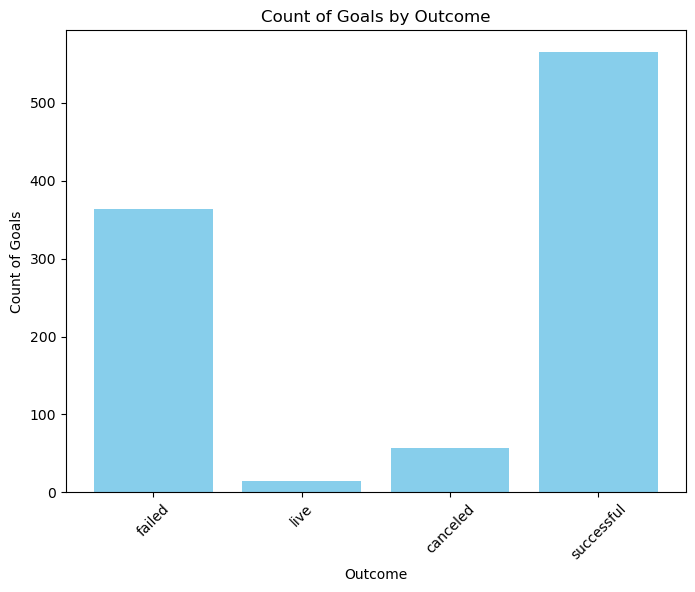

In [15]:
# Create a bar chart for goal_outcome
plt.figure(figsize=(8, 6))

# Plot the bars for count of goals
plt.bar(goal_outcome['outcome'], goal_outcome['goal'], color='skyblue')

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count of Goals')
plt.title('Count of Goals by Outcome')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [16]:
# How many backers, what did they pledge and what was the outcome
query = "SELECT  count(backers_count) as backers, country FROM campaign group by country;"

# Execute the query and load the results into a DataFrame
country_data = pd.read_sql(query, connection)

# Display the data in the DataFrame
country_data

,backers,country
0,43,AU
1,44,CA
2,31,DK
3,23,CH
4,763,US
5,48,IT
6,48,GB


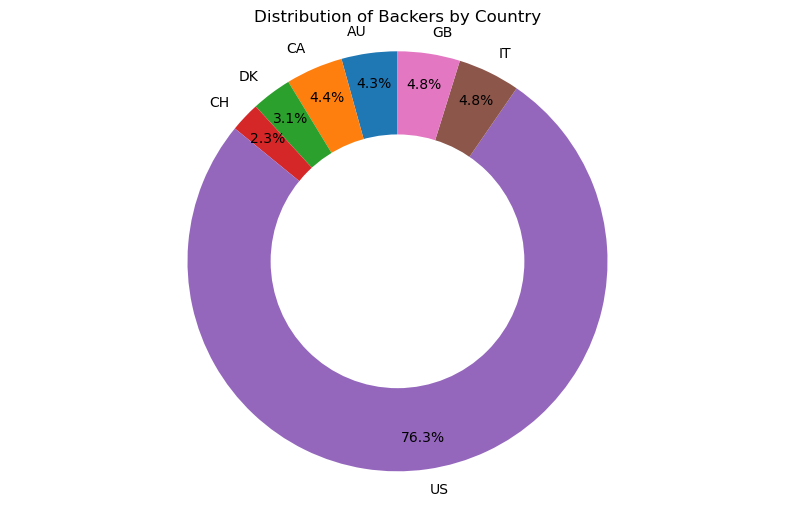

In [17]:
# Create a donut chart for country_data
plt.figure(figsize=(10, 6))

# Plot the donut chart for count of backers by country
plt.pie(country_data['backers'], labels=country_data['country'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Backers by Country')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [18]:
# Filter for USD currency
query = '''
SELECT c.currency, cat.category, sub.subcategory
FROM campaign c
JOIN category cat ON c.category_id = cat.category_id
JOIN subcategory sub ON c.subcategory_id = sub.subcategory_id
WHERE c.currency = 'USD';
'''

# Execute and store
usd_df = pd.read_sql_query(query, engine)

# Display the result
usd_df

,currency,category,subcategory
0,USD,music,rock
1,USD,music,rock
2,USD,theater,plays
3,USD,music,electric music
4,USD,film & video,drama
...,...,...,...
758,USD,publishing,translations
759,USD,food,food trucks
760,USD,theater,plays
761,USD,music,indie rock


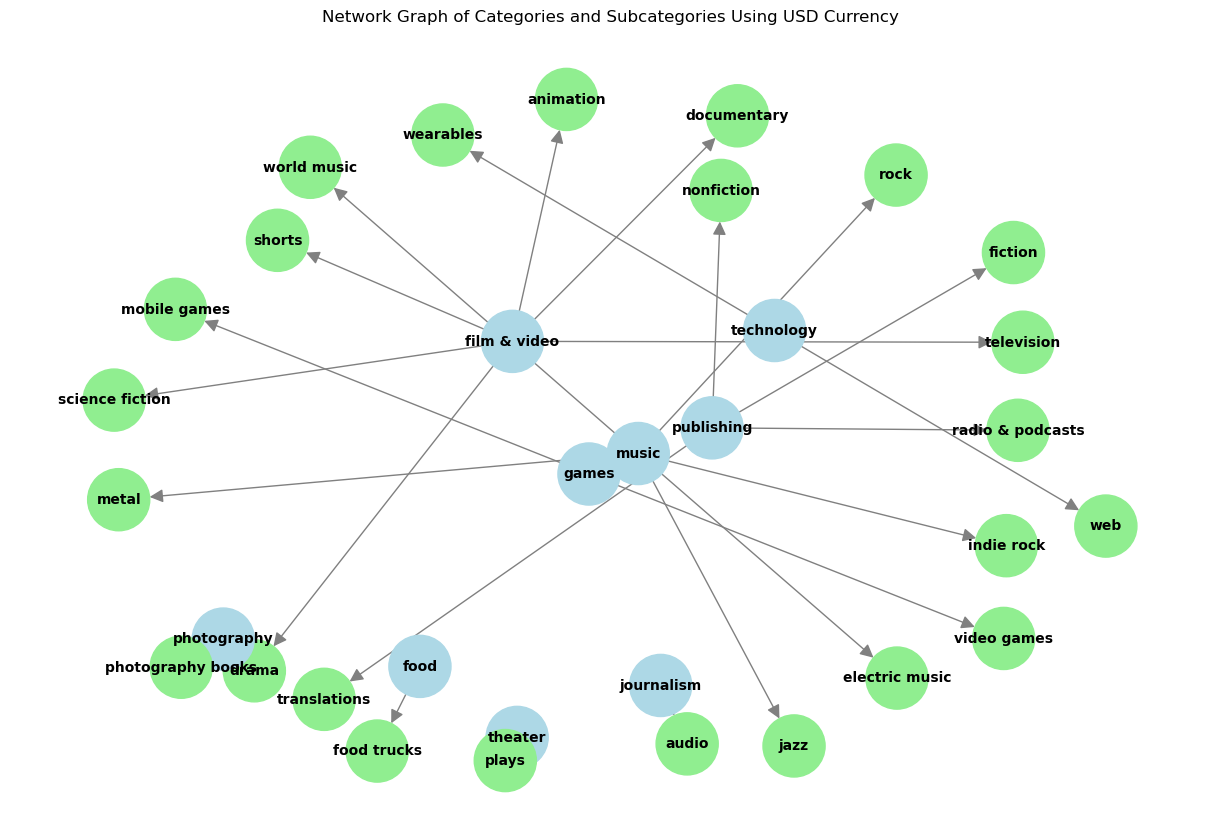

In [19]:
# Experimenting with non-class type visualization
# Unique import for this graph only
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for categories and subcategories
for idx, row in usd_df.iterrows():
    G.add_node(row['category'], node_type='category')
    G.add_node(row['subcategory'], node_type='subcategory')
    G.add_edge(row['category'], row['subcategory'])

# Set node positions
pos = nx.spring_layout(G)

# Draw graph, make colors distinct 
plt.figure(figsize=(12, 8))
node_colors = ['lightblue' if node_type == 'category' else 'lightgreen' for node_type in nx.get_node_attributes(G, 'node_type').values()]
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
plt.title('Network Graph of Categories and Subcategories Using USD Currency')
plt.show()

In [23]:
# Another import needed
import datetime as dt
# How many backers, what did they pledge and what was the outcome
query = "SELECT campaign.end_date, backers_count FROM campaign where campaign.end_date between '2021-08-01' and '2022-08-31'"
        

# Execute the query and load the results into a DataFrame
campaign_data = pd.read_sql(query, connection)
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date']).dt.month

# Display the data in the DataFrame
campaign_data.head()

,end_date,backers_count
0,12,1425
1,1,24
2,8,53
3,8,174
4,9,227


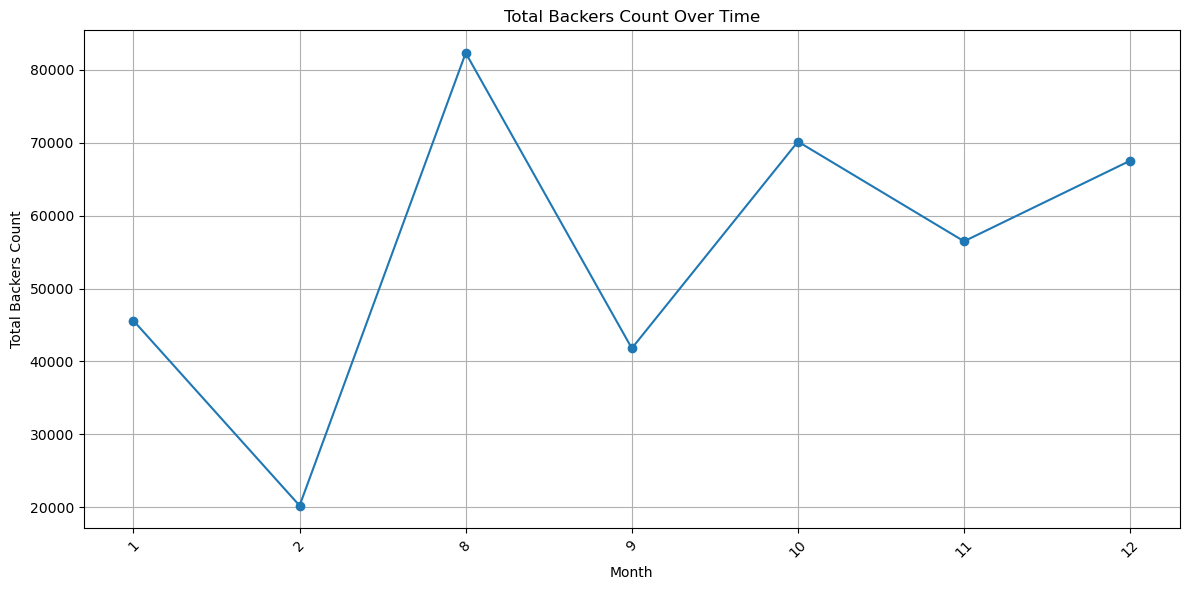

In [21]:
# Group by month and sum the backers_count
monthly_backers = campaign_data.groupby('end_date')['backers_count'].sum()

# Plot the data as a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_backers.index.astype(str), monthly_backers.values, marker='o')

# Labels
plt.xlabel('Month')
plt.ylabel('Total Backers Count')
plt.title('Total Backers Count Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Plot
plt.show()